In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pycaret.time_series import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data/New/orders_all.csv')

In [4]:
df

order_id                       customer_id  \
0      2e7a8482f6fb09756ca50c10d7bfc047  08c5351a6aca1c1589a38f244edeee9d   
1      e5fa5a7210941f7d56d0208e4e071d35  683c54fc24d40ee9f8a6fc179fd9856c   
2      809a282bbd5dbcabb6f2f724fca862ec  622e13439d6b5a0b486c435618b2679e   
3      bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
4      71303d7e93b399f5bcd537d124c0bcfa  b106b360fe2ef8849fbbd056f777b4d5   
...                                 ...                               ...   
99436  392ed9afd714e3c74767d0c4d3e3f477  2823ffda607a2316375088e0d00005ec   
99437  616fa7d4871b87832197b2a137a115d2  bf6181a85bbb4115736c0a8db1a53be3   
99438  a2ac6dad85cf8af5b0afb510a240fe8c  4c2ec60c29d10c34bd49cb88aa85cfc4   
99439  b059ee4de278302d550a3035c4cdb740  856336203359aa6a61bf3826f7d84c49   
99440  10a045cdf6a5650c21e9cfeb60384c16  a4b417188addbc05b26b72d5e44837a1   

      order_status order_purchase_timestamp order_delivered_carrier_date  \
0          shipped      2021-09-04 21:15:00          2021-10-18 13:14:00   
1         canceled      2021-09-05 00:15:00                          NaN   
2         canceled      2021-09-13 15:24:00                          NaN   
3        delivered      2021-09-15 12:16:00          2021-11-07 17:11:00   
4         canceled      2021-10-02 22:07:00                          NaN   
...            ...                      ...                          ...   
99436     canceled      2023-09-29 09:13:00                          NaN   
99437     canceled      2023-10-01 15:30:00                          NaN   
99438     canceled      2023-10-03 18:55:00                          NaN   
99439     canceled      2023-10-16 20:16:00                          NaN   
99440     canceled      2023-10-17 17:30:00                          NaN   

      order_delivered_customer_date order_estimated_delivery_date  \
0                               NaN                    2021-10-20   
1                               NaN                    2021-10-28   
2                               NaN                    2021-09-30   
3               2021-11-09 07:47:00                    2021-10-04   
4                               NaN                    2021-10-25   
...                             ...                           ...   
99436                           NaN                    2023-10-15   
99437                           NaN                    2023-10-23   
99438                           NaN                    2023-10-16   
99439                           NaN                    2023-11-12   
99440                           NaN                    2023-10-30   

       shipping_limit_date   price  freight_value  ... product_height_cm  \
0      2021-10-26 18:25:19   39.99          31.67  ...               6.0   
1      2021-09-19 00:15:34   59.50          15.56  ...               2.0   
2                      NaN     NaN            NaN  ...               NaN   
3      2021-09-19 23:11:33   44.99           2.83  ...              16.0   
4      2021-10-21 16:19:54  100.00           9.34  ...              18.0   
...                    ...     ...            ...  ...               ...   
99436                  NaN     NaN            NaN  ...               NaN   
99437                  NaN     NaN            NaN  ...               NaN   
99438                  NaN     NaN            NaN  ...               NaN   
99439                  NaN     NaN            NaN  ...               NaN   
99440                  NaN     NaN            NaN  ...               NaN   

       product_width_cm         customer_city     customer_state  seller_city  \
0                  28.0             boa vista            Roraima   monte siao   
1                  25.0           passo fundo  Rio Grande do Sul     curitiba   
2                   NaN   sao jose dos campos          São Paulo          NaN   
3                  16.0  sao joaquim da barra          São Paulo     curitiba   
4                  18.0             sao paulo 

In [5]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date', 'price',
       'freight_value', 'product_category', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_city', 'customer_state', 'seller_city', 'seller_state',
       'review_score', 'review_answer_timestamp', 'review_comment_message',
       'sibert_result'],
      dtype='object')

# With category

In [6]:
selected_columns = ['order_purchase_timestamp', 'price', 'product_category']
df1 = df[selected_columns]

In [7]:
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  99441 non-null  datetime64[ns]
 1   price                     98666 non-null  float64       
 2   product_category          99441 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.3+ MB


In [9]:
df1['price'].isnull().sum()

775

In [10]:
df1.shape

(99441, 3)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  99441 non-null  datetime64[ns]
 1   price                     98666 non-null  float64       
 2   product_category          99441 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.3+ MB


In [12]:
df1

order_purchase_timestamp   price      product_category
0          2021-09-04 21:15:00   39.99             Perfumery
1          2021-09-05 00:15:00   59.50             Telephony
2          2021-09-13 15:24:00     NaN          Garden Tools
3          2021-09-15 12:16:00   44.99  Computer Accessories
4          2021-10-02 22:07:00  100.00        Home & Kitchen
...                        ...     ...                   ...
99436      2023-09-29 09:13:00     NaN                Babies
99437      2023-10-01 15:30:00     NaN           Electronics
99438      2023-10-03 18:55:00     NaN            Bed & Bath
99439      2023-10-16 20:16:00     NaN            Bed & Bath
99440      2023-10-17 17:30:00     NaN          Garden Tools

[99441 rows x 3 columns]

In [13]:
# Fill missing 'price' values with the mean of the column
mean_price = df1['price'].mean()
df1['price'].fillna(mean_price, inplace=True)
print(df1['price'].isnull().sum())

0


## Daily Prediction

In [14]:
# Convert order_purchase_timestamp to datetime
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])

# Extract features from the timestamp
df1['year'] = df1['order_purchase_timestamp'].dt.year
df1['month'] = df1['order_purchase_timestamp'].dt.month
df1['day'] = df1['order_purchase_timestamp'].dt.day
df1['hour'] = df1['order_purchase_timestamp'].dt.hour

# Handle missing values in 'price'
df1['price'] = df1['price'].fillna(df1['price'].median())

# Filter data for training (only keep necessary columns)
data = df1[['year', 'month', 'day', 'hour', 'product_category', 'price']]

In [15]:
data

year  month  day  hour      product_category       price
0      2021      9    4    21             Perfumery   39.990000
1      2021      9    5     0             Telephony   59.500000
2      2021      9   13    15          Garden Tools  125.931263
3      2021      9   15    12  Computer Accessories   44.990000
4      2021     10    2    22        Home & Kitchen  100.000000
...     ...    ...  ...   ...                   ...         ...
99436  2023      9   29     9                Babies  125.931263
99437  2023     10    1    15           Electronics  125.931263
99438  2023     10    3    18            Bed & Bath  125.931263
99439  2023     10   16    20            Bed & Bath  125.931263
99440  2023     10   17    17          Garden Tools  125.931263

[99441 rows x 6 columns]

In [16]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['year', 'month', 'day', 'hour', 'product_category']
target = 'price'

# Split the data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

In [17]:
from pycaret.regression import *

# Initialize setup
regression_setup = setup(data=train_data, 
                         target=target, 
                         categorical_features=['product_category'], 
                         ignore_features=[], 
                         session_id=123)

In [18]:
# Compare models and select the best one
best_model = compare_models()

In [19]:
# Predict on the test set
predictions = predict_model(best_model, data=test_data)

# Display predictions
print(predictions[['price', 'prediction_label']].head())

# Evaluate the model
evaluate_model(best_model)

            price  prediction_label
480     45.900002        122.629706
90988  105.000000        114.125792
56590   35.000000        124.473086
60886   28.900000        127.829644
10585  149.899994        120.631344


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
final_model = finalize_model(best_model)

In [21]:
predictions

year  month  day  hour      product_category       price  \
480    2022      1   17    12                  Toys   45.900002   
90988  2023      7   24     8     Furniture & Decor  105.000000   
56590  2023      2   18    10            Stationery   35.000000   
60886  2023      3    6    17  Computer Accessories   28.900000   
10585  2022      5   22    16     Furniture & Decor  149.899994   
...     ...    ...  ...   ...                   ...         ...   
84271  2023      6   19    14       Beauty & Health   59.000000   
45649  2023      1    2    18             Telephony   69.989998   
35292  2022     11   19    15                  Toys   79.000000   
31310  2022     10   25    13       Beauty & Health  125.931267   
53765  2023      2    5    20            Bed & Bath  148.000000   

       prediction_label  
480          122.629706  
90988        114.125792  
56590        124.473086  
60886        127.829644  
10585        120.631344  
...                 ...  
84271        119.873301  
45649        115.491263  
35292        120.524167  
31310        118.697748  
53765        121.236555  

[19889 rows x 7 columns]

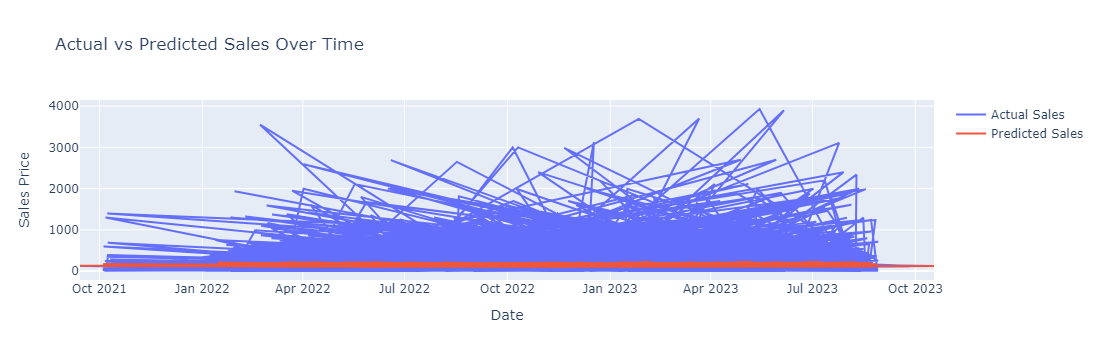

In [22]:
import plotly.graph_objs as go

# Combine year, month, day, and hour columns into a datetime column
test_data['order_purchase_datetime'] = pd.to_datetime(test_data[['year', 'month', 'day', 'hour']])

# Create a trace for actual sales
actual_trace = go.Scatter(x=test_data['order_purchase_datetime'], 
                          y=test_data['price'],
                          mode='lines',
                          name='Actual Sales')

# Create a trace for predicted sales
predicted_trace = go.Scatter(x=test_data['order_purchase_datetime'], 
                             y=predictions['prediction_label'],
                             mode='lines',
                             name='Predicted Sales')

# Create layout
layout = go.Layout(title='Actual vs Predicted Sales Over Time',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Sales Price'))

# Create figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

# Show the figure
fig.show()


## Monthly

In [33]:
# Aggregate data to monthly sales
df1['order_purchase_month'] = df1['order_purchase_timestamp'].dt.to_period('M')
monthly_data = df1.groupby(['order_purchase_month', 'product_category']).agg({
    'price': 'sum'
}).reset_index()

# Convert order_purchase_month to datetime for compatibility
monthly_data['order_purchase_month'] = monthly_data['order_purchase_month'].dt.to_timestamp()
monthly_data.head()

order_purchase_month      product_category        price
0           2021-09-01  Computer Accessories    44.990000
1           2021-09-01          Garden Tools   125.931263
2           2021-09-01             Perfumery    39.990000
3           2021-09-01             Telephony    59.500000
4           2021-10-01            Automotive  2832.502527

In [35]:
# Extract features from the timestamp
monthly_data['year'] = monthly_data['order_purchase_month'].dt.year
monthly_data['month'] = monthly_data['order_purchase_month'].dt.month

# Handle missing values in 'price' if any (though aggregation should prevent this)
monthly_data['price'] = monthly_data['price'].fillna(monthly_data['price'].median())

# Prepare data for training (only keep necessary columns)
monthly_train_data = monthly_data[['year', 'month', 'product_category', 'price']]
monthly_train_data.head()

year  month      product_category        price
0  2021      9  Computer Accessories    44.990000
1  2021      9          Garden Tools   125.931263
2  2021      9             Perfumery    39.990000
3  2021      9             Telephony    59.500000
4  2021     10            Automotive  2832.502527

In [36]:
# Define features and target
features = ['year', 'month', 'product_category']
target = 'price'

# Split the data
train_data, test_data = train_test_split(monthly_train_data, test_size=0.2, random_state=123)

In [37]:
from pycaret.regression import *

# Initialize setup
regression_setup = setup(data=train_data, 
                         target=target, 
                         categorical_features=['product_category'], 
                         ignore_features=[], 
                         session_id=123)

# Compare models and select the best one
best_model = compare_models()

# Predict on the test set
predictions = predict_model(best_model, data=test_data)

# Display predictions
print(predictions[['price', 'prediction_label']].head())

# Evaluate the model
evaluate_model(best_model)
final_model = finalize_model(best_model)


            price  prediction_label
425  62594.648438      54552.487403
506  23252.449219      30030.761796
248  38598.253906      31554.177991
236  18656.019531      22178.646280
295  70098.054688      61923.342713


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
predictions

year  month      product_category         price  prediction_label
425  2023      4  Computer Accessories  62594.648438      54552.487403
506  2023      7            Cool Stuff  23252.449219      30030.761796
248  2022      9     Furniture & Decor  38598.253906      31554.177991
236  2022      8                  Toys  18656.019531      22178.646280
295  2022     11  Computer Accessories  70098.054688      61923.342713
..    ...    ...                   ...           ...               ...
190  2022      7            Bed & Bath  40623.894531      39705.170620
479  2023      6    Construction Tools   9799.269531       6969.068765
185  2022      6       Watches & Gifts  23856.324219      30448.749703
72   2022      2      Office Furniture   6430.622559       4773.130162
188  2022      7    Bags & Accessories   9125.191406       9531.604398

[114 rows x 5 columns]

In [41]:
test_data

year  month      product_category         price
425  2023      4  Computer Accessories  62594.650000
506  2023      7            Cool Stuff  23252.450000
248  2022      9     Furniture & Decor  38598.255053
236  2022      8                  Toys  18656.020000
295  2022     11  Computer Accessories  70098.055053
..    ...    ...                   ...           ...
190  2022      7            Bed & Bath  40623.893790
479  2023      6    Construction Tools   9799.270000
185  2022      6       Watches & Gifts  23856.323790
72   2022      2      Office Furniture   6430.622527
188  2022      7    Bags & Accessories   9125.191263

[114 rows x 4 columns]

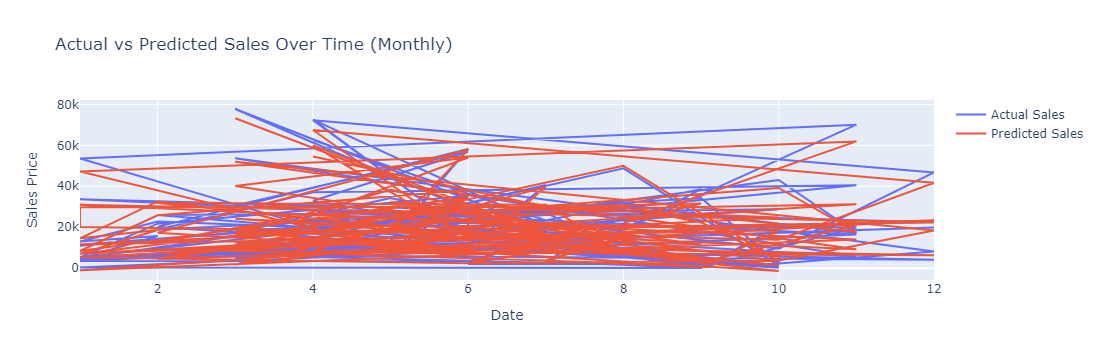

In [42]:
import plotly.graph_objs as go

# Create a trace for actual sales
actual_trace = go.Scatter(x=test_data['month'], 
                          y=test_data['price'],
                          mode='lines',
                          name='Actual Sales')

# Create a trace for predicted sales
predicted_trace = go.Scatter(x=test_data['month'], 
                             y=predictions['prediction_label'],
                             mode='lines',
                             name='Predicted Sales')

# Create layout
layout = go.Layout(title='Actual vs Predicted Sales Over Time (Monthly)',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Sales Price'))

# Create figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

# Show the figure
fig.show()

# Sales

In [6]:
selected_columns = ['order_purchase_timestamp', 'price']
dfs = df[selected_columns]

In [7]:
dfs['order_purchase_timestamp'] = pd.to_datetime(dfs['order_purchase_timestamp'])

In [8]:
dfs['price'].isnull().sum()

775

In [9]:
# Fill missing 'price' values with the mean of the column
mean_price = dfs['price'].mean()
dfs['price'].fillna(mean_price, inplace=True)
print(dfs['price'].isnull().sum())

0


In [10]:
dfs.shape

(99441, 2)

In [11]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  99441 non-null  datetime64[ns]
 1   price                     99441 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [12]:
from pycaret.time_series import *

In [13]:
# Set 'order_purchase_timestamp' as index
dfs.set_index('order_purchase_timestamp', inplace=True)

# Resample data by month
dfs_monthly = dfs.resample('M').sum()
dfs_monthly.reset_index(inplace=True)

In [14]:
dfs_monthly

order_purchase_timestamp          price
0                2021-09-30     270.411263
1                2021-10-31   47288.060214
2                2021-11-30       0.000000
3                2021-12-31      10.900000
4                2022-01-31  109378.133897
5                2022-02-28  235662.859378
6                2022-03-31  352439.981797
7                2022-04-30  334125.086424
8                2022-05-31  470195.740534
9                2022-06-30  409247.625374
10               2022-07-31  460535.442011
11               2022-08-31  528938.758007
12               2022-09-30  565669.313061
13               2022-10-31  609698.429591
14               2022-11-30  919714.077492
15               2022-12-31  697667.691904
16               2023-01-31  874209.421904
17               2023-02-28  775833.632954
18               2023-03-31  904325.879057
19               2023-04-30  913872.246317
20               2023-05-31  901728.405267
21               2023-06-30  791676.458843
22               2023-07-31  819304.564004
23               2023-08-31  798399.945801
24               2023-09-30    2033.968950
25               2023-10-31     503.725053

In [17]:
result = adfuller(dfs_monthly['price'])

# Print the test result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.101956249521772
p-value: 0.94924333453658
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674


In [18]:
# Non stationary so differencing

In [19]:
# Set 'order_purchase_timestamp' as index
dfs_monthly.set_index('order_purchase_timestamp', inplace=True)

# Perform differencing
dfs_monthly_diff = dfs_monthly.diff().dropna()

In [20]:
dfs_monthly_diff

price
order_purchase_timestamp               
2021-10-31                 47017.648950
2021-11-30                -47288.060214
2021-12-31                    10.900000
2022-01-31                109367.233897
2022-02-28                126284.725481
2022-03-31                116777.122420
2022-04-30                -18314.895374
2022-05-31                136070.654111
2022-06-30                -60948.115160
2022-07-31                 51287.816637
2022-08-31                 68403.315996
2022-09-30                 36730.555053
2022-10-31                 44029.116530
2022-11-30                310015.647901
2022-12-31               -222046.385588
2023-01-31                176541.730000
2023-02-28                -98375.788950
2023-03-31                128492.246103
2023-04-30                  9546.367260
2023-05-31                -12143.841050
2023-06-30               -110051.946424
2023-07-31                 27628.105160
2023-08-31                -20904.618203
2023-09-30               -796365.976851
2023-10-31                 -1530.243897

In [23]:
# Setup PyCaret for time series analysis
ts_setup = setup(data=dfs_monthly_diff, 
                 target='price', 
                 fold=2,  # Use 2-fold cross-validation
                 session_id=123,  # Random seed for reproducibility
                 fh=3,  # Forecast horizon (number of periods to forecast)
                 seasonal_period=12)  # Monthly seasonality (12 months for a year)

In [24]:
# Compare models
best_model = compare_models(sort='MASE')

In [25]:
# Tune the best model
tuned_model = tune_model(best_model)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


In [39]:
# Finalize model and make predictions
final_model = finalize_model(tuned_model)
future_dates = pd.date_range(start=dfs_monthly_diff.index.max(), periods=9, freq='M')[1:]
predictions = predict_model(final_model, fh=9)

In [40]:
predictions

y_pred
2023-11 -117390.9743
2023-12  -51445.5091
2024-01 -243825.5557
2024-02 -159877.8731
2024-03  -73650.2828
2024-04 -272700.9411
2024-05 -188753.2584
2024-06 -102525.6681
2024-07 -301576.3264

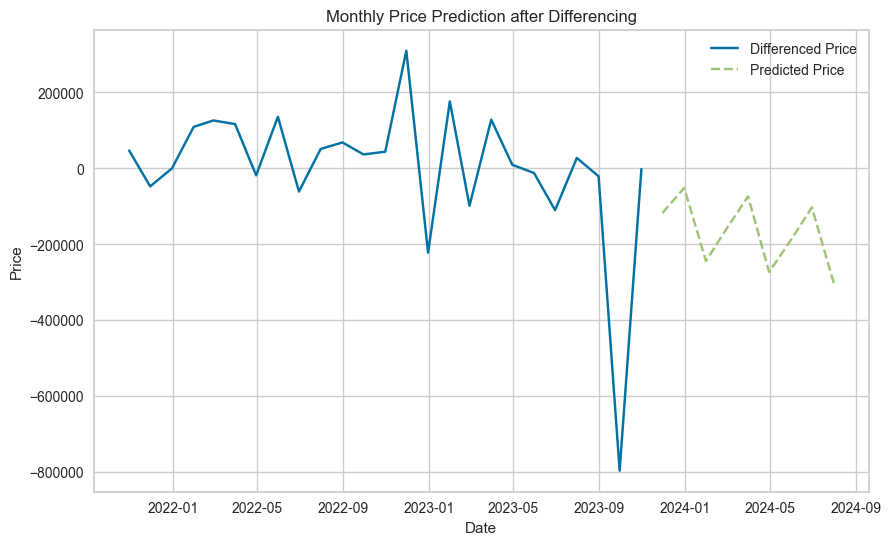

In [41]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(dfs_monthly_diff.index, dfs_monthly_diff['price'], label='Differenced Price')
plt.plot(predictions.index, predictions['y_pred'], label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction after Differencing')
plt.legend()
plt.show()

In [42]:
tuned_model

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                   n_jobs=1)],
                    regressor=AdaBoostRegressor(random_state=123),
                    window_length=1)

### SARIMAX

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMAX model
sarimax_model = SARIMAX(dfs_monthly['price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model_fit = sarimax_model.fit()

# Forecast future values
future_forecast = sarimax_model_fit.forecast(steps=9)  # Forecasting 4 steps ahead

# Display forecasted values
print(future_forecast)

2023-11-30    -91736.121302
2023-12-31    -63513.046348
2024-01-31     27203.029182
2024-02-29    164204.811550
2024-03-31    271509.724241
2024-04-30    254954.137277
2024-05-31    390275.682975
2024-06-30    335018.132942
2024-07-31    384612.427801
Freq: M, Name: predicted_mean, dtype: float64


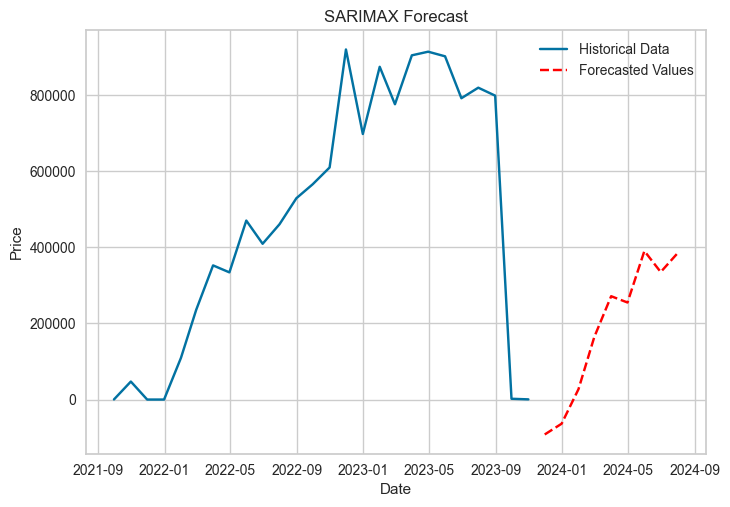

In [76]:
import matplotlib.pyplot as plt

# Plot historical data
plt.plot(dfs_monthly.index, dfs_monthly['price'], label='Historical Data')

# Plot forecasted values
future_dates = pd.date_range(start=dfs_monthly.index.max(), periods=10, freq='M')[1:]  # Generating future dates
plt.plot(future_dates, future_forecast, color='red', linestyle='--', label='Forecasted Values')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SARIMAX Forecast')

# Add legend
plt.legend()

# Show plot
plt.show()

In [78]:
# Perform differencing
dfs_monthly_diff

price
order_purchase_timestamp               
2021-10-31                 47017.648950
2021-11-30                -47288.060214
2021-12-31                    10.900000
2022-01-31                109367.233897
2022-02-28                126284.725481
2022-03-31                116777.122420
2022-04-30                -18314.895374
2022-05-31                136070.654111
2022-06-30                -60948.115160
2022-07-31                 51287.816637
2022-08-31                 68403.315996
2022-09-30                 36730.555053
2022-10-31                 44029.116530
2022-11-30                310015.647901
2022-12-31               -222046.385588
2023-01-31                176541.730000
2023-02-28                -98375.788950
2023-03-31                128492.246103
2023-04-30                  9546.367260
2023-05-31                -12143.841050
2023-06-30               -110051.946424
2023-07-31                 27628.105160
2023-08-31                -20904.618203
2023-09-30               -796365.976851
2023-10-31                 -1530.243897

## With differenced values

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMAX model
sarimax_model = SARIMAX(dfs_monthly_diff['price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model_fit = sarimax_model.fit()

# Forecast future values
future_forecast = sarimax_model_fit.forecast(steps=12)  # Forecasting 4 steps ahead

# Display forecasted values
print(future_forecast)

2023-11-30   -465443.378327
2023-12-31   -254685.825926
2024-01-31   -238975.990975
2024-02-29   -179657.780333
2024-03-31   -204619.026716
2024-04-30   -317885.372693
2024-05-31   -194842.346419
2024-06-30   -380719.263865
2024-07-31   -263498.902440
2024-08-31   -251287.150160
2024-09-30   -390777.043472
2024-10-31   -274571.007401
Freq: M, Name: predicted_mean, dtype: float64


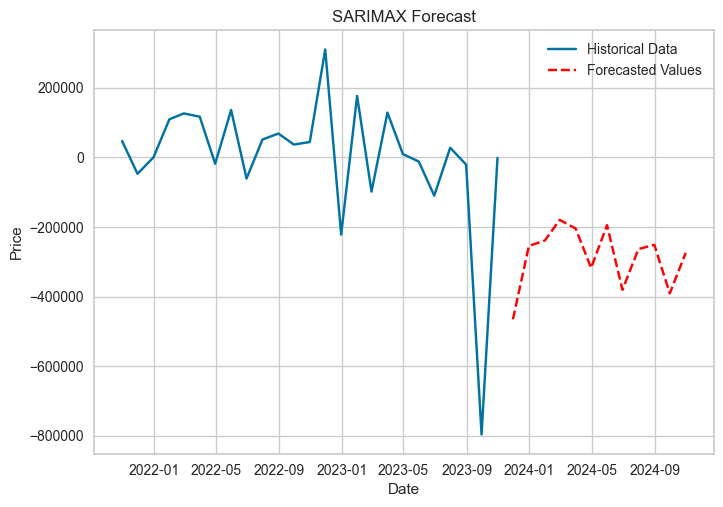

In [85]:
import matplotlib.pyplot as plt

# Plot historical data
plt.plot(dfs_monthly_diff.index, dfs_monthly_diff['price'], label='Historical Data')

# Plot forecasted values
future_dates = pd.date_range(start=dfs_monthly_diff.index.max(), periods=13, freq='M')[1:]  # Generating future dates
plt.plot(future_dates, future_forecast, color='red', linestyle='--', label='Forecasted Values')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SARIMAX Forecast')

# Add legend
plt.legend()

# Show plot
plt.show()

## Fine Tuning using pdarima

In [89]:
from pmdarima import auto_arima

sarimax_tuned = auto_arima(
    dfs_monthly['price'],
    seasonal=True,
    m=12,
    trace=True,
    seasonal_test='ch',
    suppress_warnings=True,
    error_action='ignore'
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=683.428, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=687.177, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=687.487, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=681.447, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=685.413, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=685.413, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=687.413, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=685.214, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=685.513, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=687.303, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.492 seconds


In [91]:
sarimax_tuned_diff = auto_arima(
    dfs_monthly_diff['price'],
    seasonal=True,
    m=12,
    trace=True,
    seasonal_test='ch',
    suppress_warnings=True,
    error_action='ignore'
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=683.428, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=687.188, Time=0.02 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=687.495, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=681.428, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=685.414, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=685.414, Time=0.02 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=687.414, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=685.222, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=685.518, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=687.320, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 0.358 seconds


# Hyperparameter tuning

In [97]:
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into train and validation sets
train_data, valid_data = train_test_split(dfs_monthly_diff['price'], test_size=0.2, shuffle=False)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'd': range(0, 2),   # Differencing order
    'start_p': range(1, 3),  # Starting value for p
    'start_q': range(1, 3),  # Starting value for q
    'max_p': range(1, 3),  # Maximum value for p
    'max_q': range(1, 3),  # Maximum value for q
    'start_P': range(0, 2),  # Starting value for seasonal P
    'start_Q': range(0, 2),  # Starting value for seasonal Q
    'max_P': range(0, 2),  # Maximum value for seasonal P
    'max_Q': range(0, 2),  # Maximum value for seasonal Q
    'm': [12],  # Seasonality period
    'seasonal': [True],  # Whether the model should be seasonal
    'stepwise': [True],  # Whether to use stepwise search
    'trace': [True],  # Whether to print debugging information
    'suppress_warnings': [True],  # Suppress convergence warnings
    'error_action': ['ignore'],  # Ignore errors
}

# Perform hyperparameter tuning
sarimax_tuned = auto_arima(train_data, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=True, m=12,
                           d=1, D=1, start_P=1, start_Q=1, max_P=3, max_Q=3, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the tuned model
print(sarimax_tuned.summary())

# Retrain the tuned model on the entire training data
final_sarimax_model = sarimax_tuned.fit(train_data)

# Forecast using the tuned model
forecast = final_sarimax_model.predict(n_periods=len(valid_data))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=194.777, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=205.027, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=192.778, Time=0.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=197.452, Time=0.02 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=194.777, Time=0.16 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=194.619, Time=0.17 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=201.822, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=200.145, Time=0.25 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=inf, Time=0.12

In [98]:
# Define and fit the SARIMAX model
sarimax_model = SARIMAX(dfs_monthly_diff['price'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarimax_model_fit = sarimax_model.fit()

# Forecast future values
future_forecast = sarimax_model_fit.forecast(steps=12)  # Forecasting 4 steps ahead

# Display forecasted values
print(future_forecast)

2023-11-30   -474297.262683
2023-12-31   -241937.099121
2024-01-31   -244595.464762
2024-02-29   -174247.673982
2024-03-31   -208510.465578
2024-04-30   -314748.833922
2024-05-31   -192841.194318
2024-06-30   -371288.968134
2024-07-31   -262018.742090
2024-08-31   -247973.455816
2024-09-30   -351558.065937
2024-10-31   -268983.181434
Freq: M, Name: predicted_mean, dtype: float64


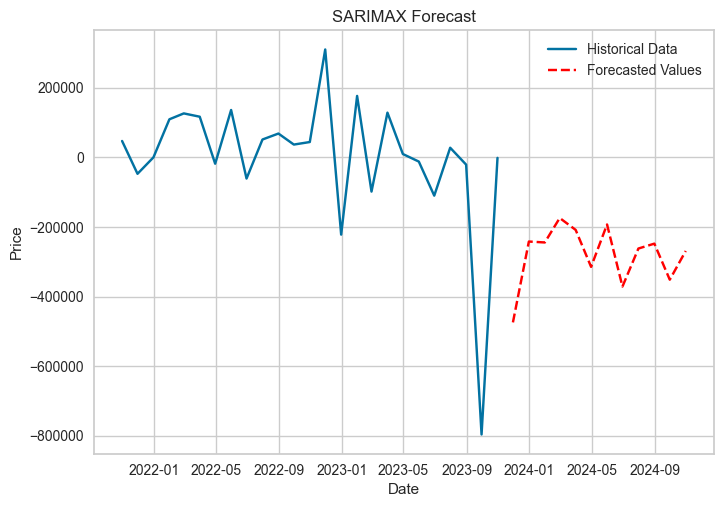

In [99]:
import matplotlib.pyplot as plt

# Plot historical data
plt.plot(dfs_monthly_diff.index, dfs_monthly_diff['price'], label='Historical Data')

# Plot forecasted values
future_dates = pd.date_range(start=dfs_monthly_diff.index.max(), periods=13, freq='M')[1:]  # Generating future dates
plt.plot(future_dates, future_forecast, color='red', linestyle='--', label='Forecasted Values')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SARIMAX Forecast')

# Add legend
plt.legend()

# Show plot
plt.show()

In [107]:
dfs_monthly_diff

price
order_purchase_timestamp               
2021-10-31                 47017.648950
2021-11-30                -47288.060214
2021-12-31                    10.900000
2022-01-31                109367.233897
2022-02-28                126284.725481
2022-03-31                116777.122420
2022-04-30                -18314.895374
2022-05-31                136070.654111
2022-06-30                -60948.115160
2022-07-31                 51287.816637
2022-08-31                 68403.315996
2022-09-30                 36730.555053
2022-10-31                 44029.116530
2022-11-30                310015.647901
2022-12-31               -222046.385588
2023-01-31                176541.730000
2023-02-28                -98375.788950
2023-03-31                128492.246103
2023-04-30                  9546.367260
2023-05-31                -12143.841050
2023-06-30               -110051.946424
2023-07-31                 27628.105160
2023-08-31                -20904.618203
2023-09-30               -796365.976851
2023-10-31                 -1530.243897

In [105]:
future_forecast

2023-11-30   -474297.262683
2023-12-31   -241937.099121
2024-01-31   -244595.464762
2024-02-29   -174247.673982
2024-03-31   -208510.465578
2024-04-30   -314748.833922
2024-05-31   -192841.194318
2024-06-30   -371288.968134
2024-07-31   -262018.742090
2024-08-31   -247973.455816
2024-09-30   -351558.065937
2024-10-31   -268983.181434
Freq: M, Name: predicted_mean, dtype: float64

In [109]:
dfs_monthly

price
order_purchase_timestamp               
2021-09-30                   270.411263
2021-10-31                 47288.060214
2021-11-30                     0.000000
2021-12-31                    10.900000
2022-01-31                109378.133897
2022-02-28                235662.859378
2022-03-31                352439.981797
2022-04-30                334125.086424
2022-05-31                470195.740534
2022-06-30                409247.625374
2022-07-31                460535.442011
2022-08-31                528938.758007
2022-09-30                565669.313061
2022-10-31                609698.429591
2022-11-30                919714.077492
2022-12-31                697667.691904
2023-01-31                874209.421904
2023-02-28                775833.632954
2023-03-31                904325.879057
2023-04-30                913872.246317
2023-05-31                901728.405267
2023-06-30                791676.458843
2023-07-31                819304.564004
2023-08-31                798399.945801
2023-09-30                  2033.968950
2023-10-31                   503.725053

In [112]:
# Convert future_forecast to DataFrame
future_forecast_df = future_forecast.to_frame(name='price_diff')

# Rename the 'price' column in dfs_monthly_diff to 'actual_price'
dfs_monthly_diff = dfs_monthly_diff.rename(columns={'price': 'price_diff'})

# Combine actual and forecasted values into a single DataFrame
combined_df = pd.concat([dfs_monthly_diff, future_forecast_df], axis=0)

In [113]:
combined_df

price_diff
2021-10-31   47017.648950
2021-11-30  -47288.060214
2021-12-31      10.900000
2022-01-31  109367.233897
2022-02-28  126284.725481
2022-03-31  116777.122420
2022-04-30  -18314.895374
2022-05-31  136070.654111
2022-06-30  -60948.115160
2022-07-31   51287.816637
2022-08-31   68403.315996
2022-09-30   36730.555053
2022-10-31   44029.116530
2022-11-30  310015.647901
2022-12-31 -222046.385588
2023-01-31  176541.730000
2023-02-28  -98375.788950
2023-03-31  128492.246103
2023-04-30    9546.367260
2023-05-31  -12143.841050
2023-06-30 -110051.946424
2023-07-31   27628.105160
2023-08-31  -20904.618203
2023-09-30 -796365.976851
2023-10-31   -1530.243897
2023-11-30 -474297.262683
2023-12-31 -241937.099121
2024-01-31 -244595.464762
2024-02-29 -174247.673982
2024-03-31 -208510.465578
2024-04-30 -314748.833922
2024-05-31 -192841.194318
2024-06-30 -371288.968134
2024-07-31 -262018.742090
2024-08-31 -247973.455816
2024-09-30 -351558.065937
2024-10-31 -268983.181434

In [114]:
combined_df = pd.concat([combined_df, dfs_monthly], axis=1)

In [117]:
combined_df = combined_df.rename(columns={'price': 'original_price'})

In [118]:
combined_df

price_diff  original_price
2021-09-30            NaN      270.411263
2021-10-31   47017.648950    47288.060214
2021-11-30  -47288.060214        0.000000
2021-12-31      10.900000       10.900000
2022-01-31  109367.233897   109378.133897
2022-02-28  126284.725481   235662.859378
2022-03-31  116777.122420   352439.981797
2022-04-30  -18314.895374   334125.086424
2022-05-31  136070.654111   470195.740534
2022-06-30  -60948.115160   409247.625374
2022-07-31   51287.816637   460535.442011
2022-08-31   68403.315996   528938.758007
2022-09-30   36730.555053   565669.313061
2022-10-31   44029.116530   609698.429591
2022-11-30  310015.647901   919714.077492
2022-12-31 -222046.385588   697667.691904
2023-01-31  176541.730000   874209.421904
2023-02-28  -98375.788950   775833.632954
2023-03-31  128492.246103   904325.879057
2023-04-30    9546.367260   913872.246317
2023-05-31  -12143.841050   901728.405267
2023-06-30 -110051.946424   791676.458843
2023-07-31   27628.105160   819304.564004
2023-08-31  -20904.618203   798399.945801
2023-09-30 -796365.976851     2033.968950
2023-10-31   -1530.243897      503.725053
2023-11-30 -474297.262683             NaN
2023-12-31 -241937.099121             NaN
2024-01-31 -244595.464762             NaN
2024-02-29 -174247.673982             NaN
2024-03-31 -208510.465578             NaN
2024-04-30 -314748.833922             NaN
2024-05-31 -192841.194318             NaN
2024-06-30 -371288.968134             NaN
2024-07-31 -262018.742090             NaN
2024-08-31 -247973.455816             NaN
2024-09-30 -351558.065937             NaN
2024-10-31 -268983.181434             NaN

In [125]:
# Extract the last known original price before differencing
initial_price = combined_df.loc['2021-09-30', 'original_price']
print(initial_price)

270.4112633531308


In [130]:
# Calculate the cumulative sum of differences
combined_df['New_Sales'] = combined_df['price_diff'].cumsum()

# Add the initial sales value to the cumulative sum
initial_sales = combined_df['original_price'].iloc[0]
combined_df['New_Sales'] = combined_df['New_Sales'] + initial_sales

# Fill NaN with the initial sales value
combined_df['New_Sales'].fillna(initial_sales, inplace=True)

In [131]:
combined_df

price_diff  original_price  reconstructed_original_price  \
2021-09-30            NaN      270.411263                           NaN   
2021-10-31   47017.648950    47288.060214                  4.701765e+04   
2021-11-30  -47288.060214        0.000000                 -2.704113e+02   
2021-12-31      10.900000       10.900000                 -2.595113e+02   
2022-01-31  109367.233897   109378.133897                  1.091077e+05   
2022-02-28  126284.725481   235662.859378                  2.353924e+05   
2022-03-31  116777.122420   352439.981797                  3.521696e+05   
2022-04-30  -18314.895374   334125.086424                  3.338547e+05   
2022-05-31  136070.654111   470195.740534                  4.699253e+05   
2022-06-30  -60948.115160   409247.625374                  4.089772e+05   
2022-07-31   51287.816637   460535.442011                  4.602650e+05   
2022-08-31   68403.315996   528938.758007                  5.286683e+05   
2022-09-30   36730.555053   565669.313061                  5.653989e+05   
2022-10-31   44029.116530   609698.429591                  6.094280e+05   
2022-11-30  310015.647901   919714.077492                  9.194437e+05   
2022-12-31 -222046.385588   697667.691904                  6.973973e+05   
2023-01-31  176541.730000   874209.421904                  8.739390e+05   
2023-02-28  -98375.788950   775833.632954                  7.755632e+05   
2023-03-31  128492.246103   904325.879057                  9.040555e+05   
2023-04-30    9546.367260   913872.246317                  9.136018e+05   
2023-05-31  -12143.841050   901728.405267                  9.014580e+05   
2023-06-30 -110051.946424   791676.458843                  7.914060e+05   
2023-07-31   27628.105160   819304.564004                  8.190342e+05   
2023-08-31  -20904.618203   798399.945801                  7.981295e+05   
2023-09-30 -796365.976851     2033.968950                  1.763558e+03   
2023-10-31   -1530.243897      503.725053                  2.333138e+02   
2023-11-30 -474297.262683             NaN                 -4.740639e+05   
2023-12-31 -241937.099121             NaN                 -7.160010e+05   
2024-01-31 -244595.464762             NaN                 -9.605965e+05   
2024-02-29 -174247.673982             NaN                 -1.134844e+06   
2024-03-31 -208510.465578             NaN                 -1.343355e+06   
2024-04-30 -314748.833922             NaN                 -1.658103e+06   
2024-05-31 -192841.194318             NaN                 -1.850945e+06   
2024-06-30 -371288.968134             NaN                 -2.222234e+06   
2024-07-31 -262018.742090             NaN                 -2.484252e+06   
2024-08-31 -247973.455816             NaN                 -2.732226e+06   
2024-09-30 -351558.065937             NaN                 -3.083784e+06   
2024-10-31 -268983.181434             NaN                 -3.352767e+06   

               New_Sales  
2021-09-30  2.704113e+02  
2021-10-31  4.728806e+04  
2021-11-30 -2.330580e-12  
2021-12-31  1.090000e+01  
2022-01-31  1.093781e+05  
2022-02-28  2.356629e+05  
2022-03-31  3.524400e+05  
2022-04-30  3.341251e+05  
2022-05-31  4.701957e+05  
2022-06-30  4.092476e+05  
2022-07-31  4.605354e+05  
2022-08-31  5.289388e+05  
2022-09-30  5.656693e+05  
2022-10-31  6.096984e+05  
2022-11-30  9.197141e+05  
2022-12-31  6.976677e+05  
2023-01-31  8.742094e+05  
2023-02-28  7.758336e+05  
2023-03-31  9.043259e+05  
2023-04-30  9.138722e+05  
2023-05-31  9.017284e+05  
2023-06-30  7.916765e+05  
2023-07-31  8.193046e+05  
2023-08-31  7.983999e+05  
2023-09-30  2.033969e+03  
2023-10-31  5.037251e+02  
2023-11-30 -4.737935e+05  
2023-12-31 -7.157306e+05  
2024-01-31 -9.603261e+05  
2024-02-29 -1.134574e+06  
2024-03-31 -1.343084e+06  
2024-04-30 -1.657833e+06  
2024-05-31 -1.850674e+06  
2024-06-30 -2.221963e+06  
2024-07-31 -2.483982e+06  
2024-08-31 -2.731955e+06  
2024-09-30 -3.083514e+06  
2024-10-31 -3.352497e+06

In [132]:
combined_df['New_Sales'] = round(combined_df['New_Sales'],2)

In [135]:
combined_df.drop(['reconstructed_original_price'], axis=1, inplace=True)

In [136]:
combined_df

price_diff  original_price   New_Sales
2021-09-30            NaN      270.411263      270.41
2021-10-31   47017.648950    47288.060214    47288.06
2021-11-30  -47288.060214        0.000000       -0.00
2021-12-31      10.900000       10.900000       10.90
2022-01-31  109367.233897   109378.133897   109378.13
2022-02-28  126284.725481   235662.859378   235662.86
2022-03-31  116777.122420   352439.981797   352439.98
2022-04-30  -18314.895374   334125.086424   334125.09
2022-05-31  136070.654111   470195.740534   470195.74
2022-06-30  -60948.115160   409247.625374   409247.63
2022-07-31   51287.816637   460535.442011   460535.44
2022-08-31   68403.315996   528938.758007   528938.76
2022-09-30   36730.555053   565669.313061   565669.31
2022-10-31   44029.116530   609698.429591   609698.43
2022-11-30  310015.647901   919714.077492   919714.08
2022-12-31 -222046.385588   697667.691904   697667.69
2023-01-31  176541.730000   874209.421904   874209.42
2023-02-28  -98375.788950   775833.632954   775833.63
2023-03-31  128492.246103   904325.879057   904325.88
2023-04-30    9546.367260   913872.246317   913872.25
2023-05-31  -12143.841050   901728.405267   901728.41
2023-06-30 -110051.946424   791676.458843   791676.46
2023-07-31   27628.105160   819304.564004   819304.56
2023-08-31  -20904.618203   798399.945801   798399.95
2023-09-30 -796365.976851     2033.968950     2033.97
2023-10-31   -1530.243897      503.725053      503.73
2023-11-30 -474297.262683             NaN  -473793.54
2023-12-31 -241937.099121             NaN  -715730.64
2024-01-31 -244595.464762             NaN  -960326.10
2024-02-29 -174247.673982             NaN -1134573.78
2024-03-31 -208510.465578             NaN -1343084.24
2024-04-30 -314748.833922             NaN -1657833.07
2024-05-31 -192841.194318             NaN -1850674.27
2024-06-30 -371288.968134             NaN -2221963.24
2024-07-31 -262018.742090             NaN -2483981.98
2024-08-31 -247973.455816             NaN -2731955.44
2024-09-30 -351558.065937             NaN -3083513.50
2024-10-31 -268983.181434             NaN -3352496.68

In [1]:
# Extract the last known actual sales value
initial_sales = dfs_monthly['price'].iloc[-1]

# Create an empty list to store forecasted sales values
forecasted_sales = []

# Start with the initial sales value
current_sales = initial_sales

# Iteratively add forecasted differences to obtain forecasted sales
for diff in future_forecast:
    current_sales += diff
    forecasted_sales.append(current_sales)

# Convert the list to a pandas Series
forecasted_sales_series = pd.Series(forecasted_sales, index=future_dates)

# Combine actual and forecasted sales into a single DataFrame
combined_df = pd.concat([dfs_monthly['price'], forecasted_sales_series], axis=0)
combined_df = combined_df.rename(columns={'price': 'Sales'})

# Plot the combined DataFrame
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast')
plt.show()

NameError: name 'dfs_monthly' is not defined